In [10]:
# Traffic Accident Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


# 1. Load Dataset
zip_path = "/content/archive.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files inside zip:", z.namelist())
    file_name = z.namelist()[0]
    df = pd.read_csv(z.open(file_name))

print("Dataset shape:", df.shape)
print("Columns:", df.columns)


Files inside zip: ['dataset_traffic_accident_prediction1.csv']
Dataset shape: (840, 14)
Columns: Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')


In [3]:

# 2. Data Cleaning
# Check missing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64


In [4]:
# Drop rows with too many missing values
df = df.dropna()

# Preview cleaned dataset
print("\nCleaned shape:", df.shape)


Cleaned shape: (405, 14)


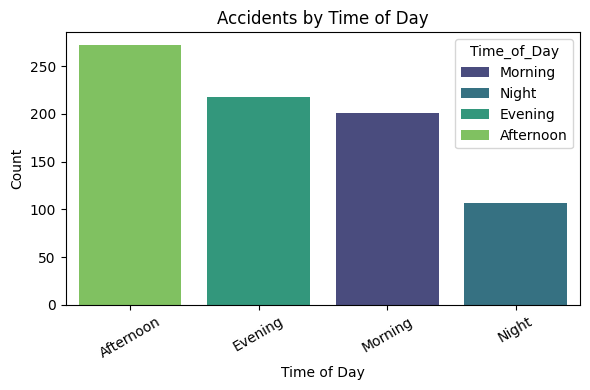

In [15]:

# 3. Analysis - Time of Day
plt.figure(figsize=(6,4))
sns.countplot(x="Time_of_Day", data=df, order=df["Time_of_Day"].value_counts().index,hue="Time_of_Day", palette="viridis")
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

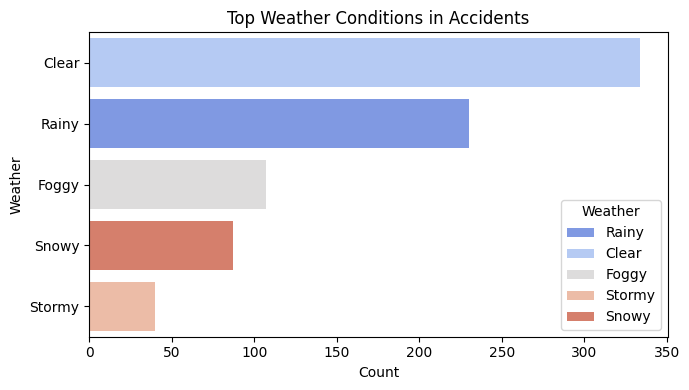

In [16]:

# 4. Analysis - Weather
plt.figure(figsize=(7,4))
sns.countplot(y="Weather", data=df, order=df["Weather"].value_counts().index[:10],hue="Weather", palette="coolwarm")
plt.title("Top Weather Conditions in Accidents")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.tight_layout()
plt.show()


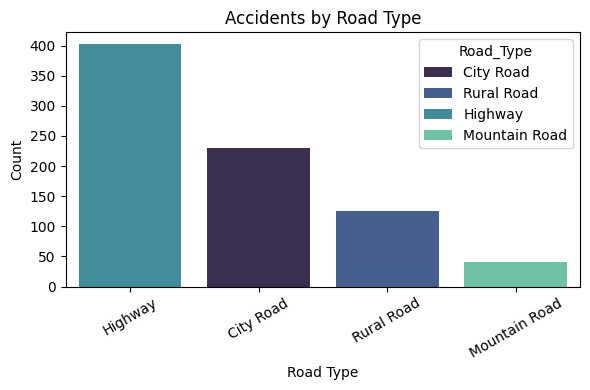

In [18]:

# 5. Analysis - Road Type

plt.figure(figsize=(6,4))
sns.countplot(x="Road_Type", data=df, order=df["Road_Type"].value_counts().index,hue="Road_Type" ,palette="mako")
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

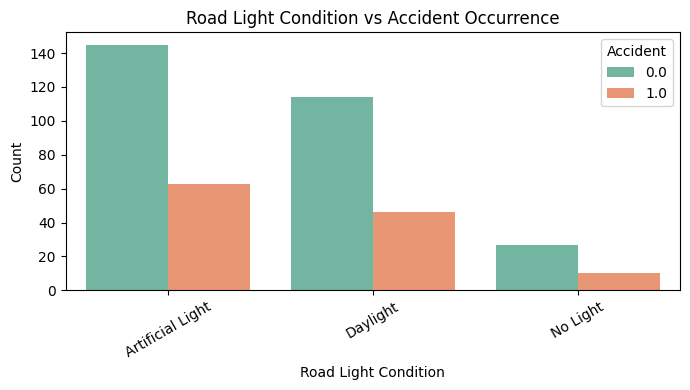

In [8]:

# 6. Road Light Condition vs Accident
plt.figure(figsize=(7,4))
sns.countplot(x="Road_Light_Condition", hue="Accident", data=df, palette="Set2")
plt.title("Road Light Condition vs Accident Occurrence")
plt.xlabel("Road Light Condition")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [9]:

# 7. Accident Hotspots

if "Latitude" in df.columns and "Longitude" in df.columns:
    plt.figure(figsize=(6,6))
    sns.kdeplot(x=df["Longitude"], y=df["Latitude"], cmap="Reds", fill=True, thresh=0.05)
    plt.title("Accident Hotspot Heatmap")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("\n⚠ No Latitude/Longitude columns found in dataset → Skipping hotspot map")


⚠ No Latitude/Longitude columns found in dataset → Skipping hotspot map


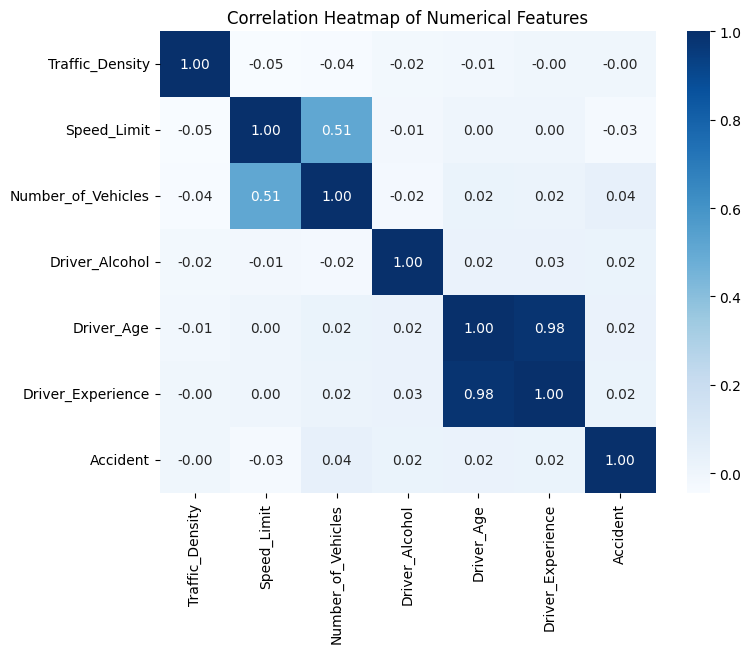

In [11]:
# 8. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()